## Titanic - Machine Learning from Disaster

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm # Statistical computations and models for Python
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices # A Python package for describing statistical models and for building design matrices.
from sklearn import datasets, svm
# from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details
# KaggleAux is a collection of statistical tools to aid Data Science competitors in Kaggle Competitions.
# pip install gnureadline, ipython, matplotlib, mock, nose, numpy, pandas, pyparsing, python-dateutil, pytz, six, wsgiref, scipy, statsmodels, patsy

import matplotlib.pyplot as plt
%matplotlib inline

### Data Handling

In [3]:
# Let's read our data in using pandas:
df = pd.read_csv("D:/AMIR/Programming/Data Analyst/Titanic Machine Learning From Disaster/Dataset/train.csv") 

In [4]:
# Show an overview of our data:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Looking at the data frame above:

- First, it lets us know we have 891 observations, or passengers, to analyze here:

    - Int64Index: 891 entries, 0 to 890

- Next it shows us all of the columns in DataFrame. Each column tells us something about each of our observations, like their name, sex, or age. These columns are called features of our dataset. 


- After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the survived feature here:

    - survived    891  non-null values 

- some are missing information, like the age feature:

    - age         714  non-null values 


- These missing values are represented as NaNs.

#### Take care of missing values:

- The features 'Ticket' and 'Cabin' have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the data frame to preserve the integrity of our dataset.


- To do that we'll use this line of code to drop the features entirely:

    - df = df.drop(['ticket','cabin'], axis=1) 


- While this line of code removes the NaN values from every remaining column/feature:

    - df = df.dropna()

- Now we have a clean and tidy dataset that is ready for analysis. Because .dropna() removes an observation from our data even if it only has 1 NaN in one of the features, it would have removed most of our dataset if we had not dropped the ticket and cabin features first.

In [5]:
df = df.drop(['Ticket','Cabin'], axis=1)

In [6]:
# Remove NaN values
df = df.dropna() 

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### Take a Look at your data graphically

Text(0.5, 1.0, 'Distribution of Survival, (1 = Survived)')

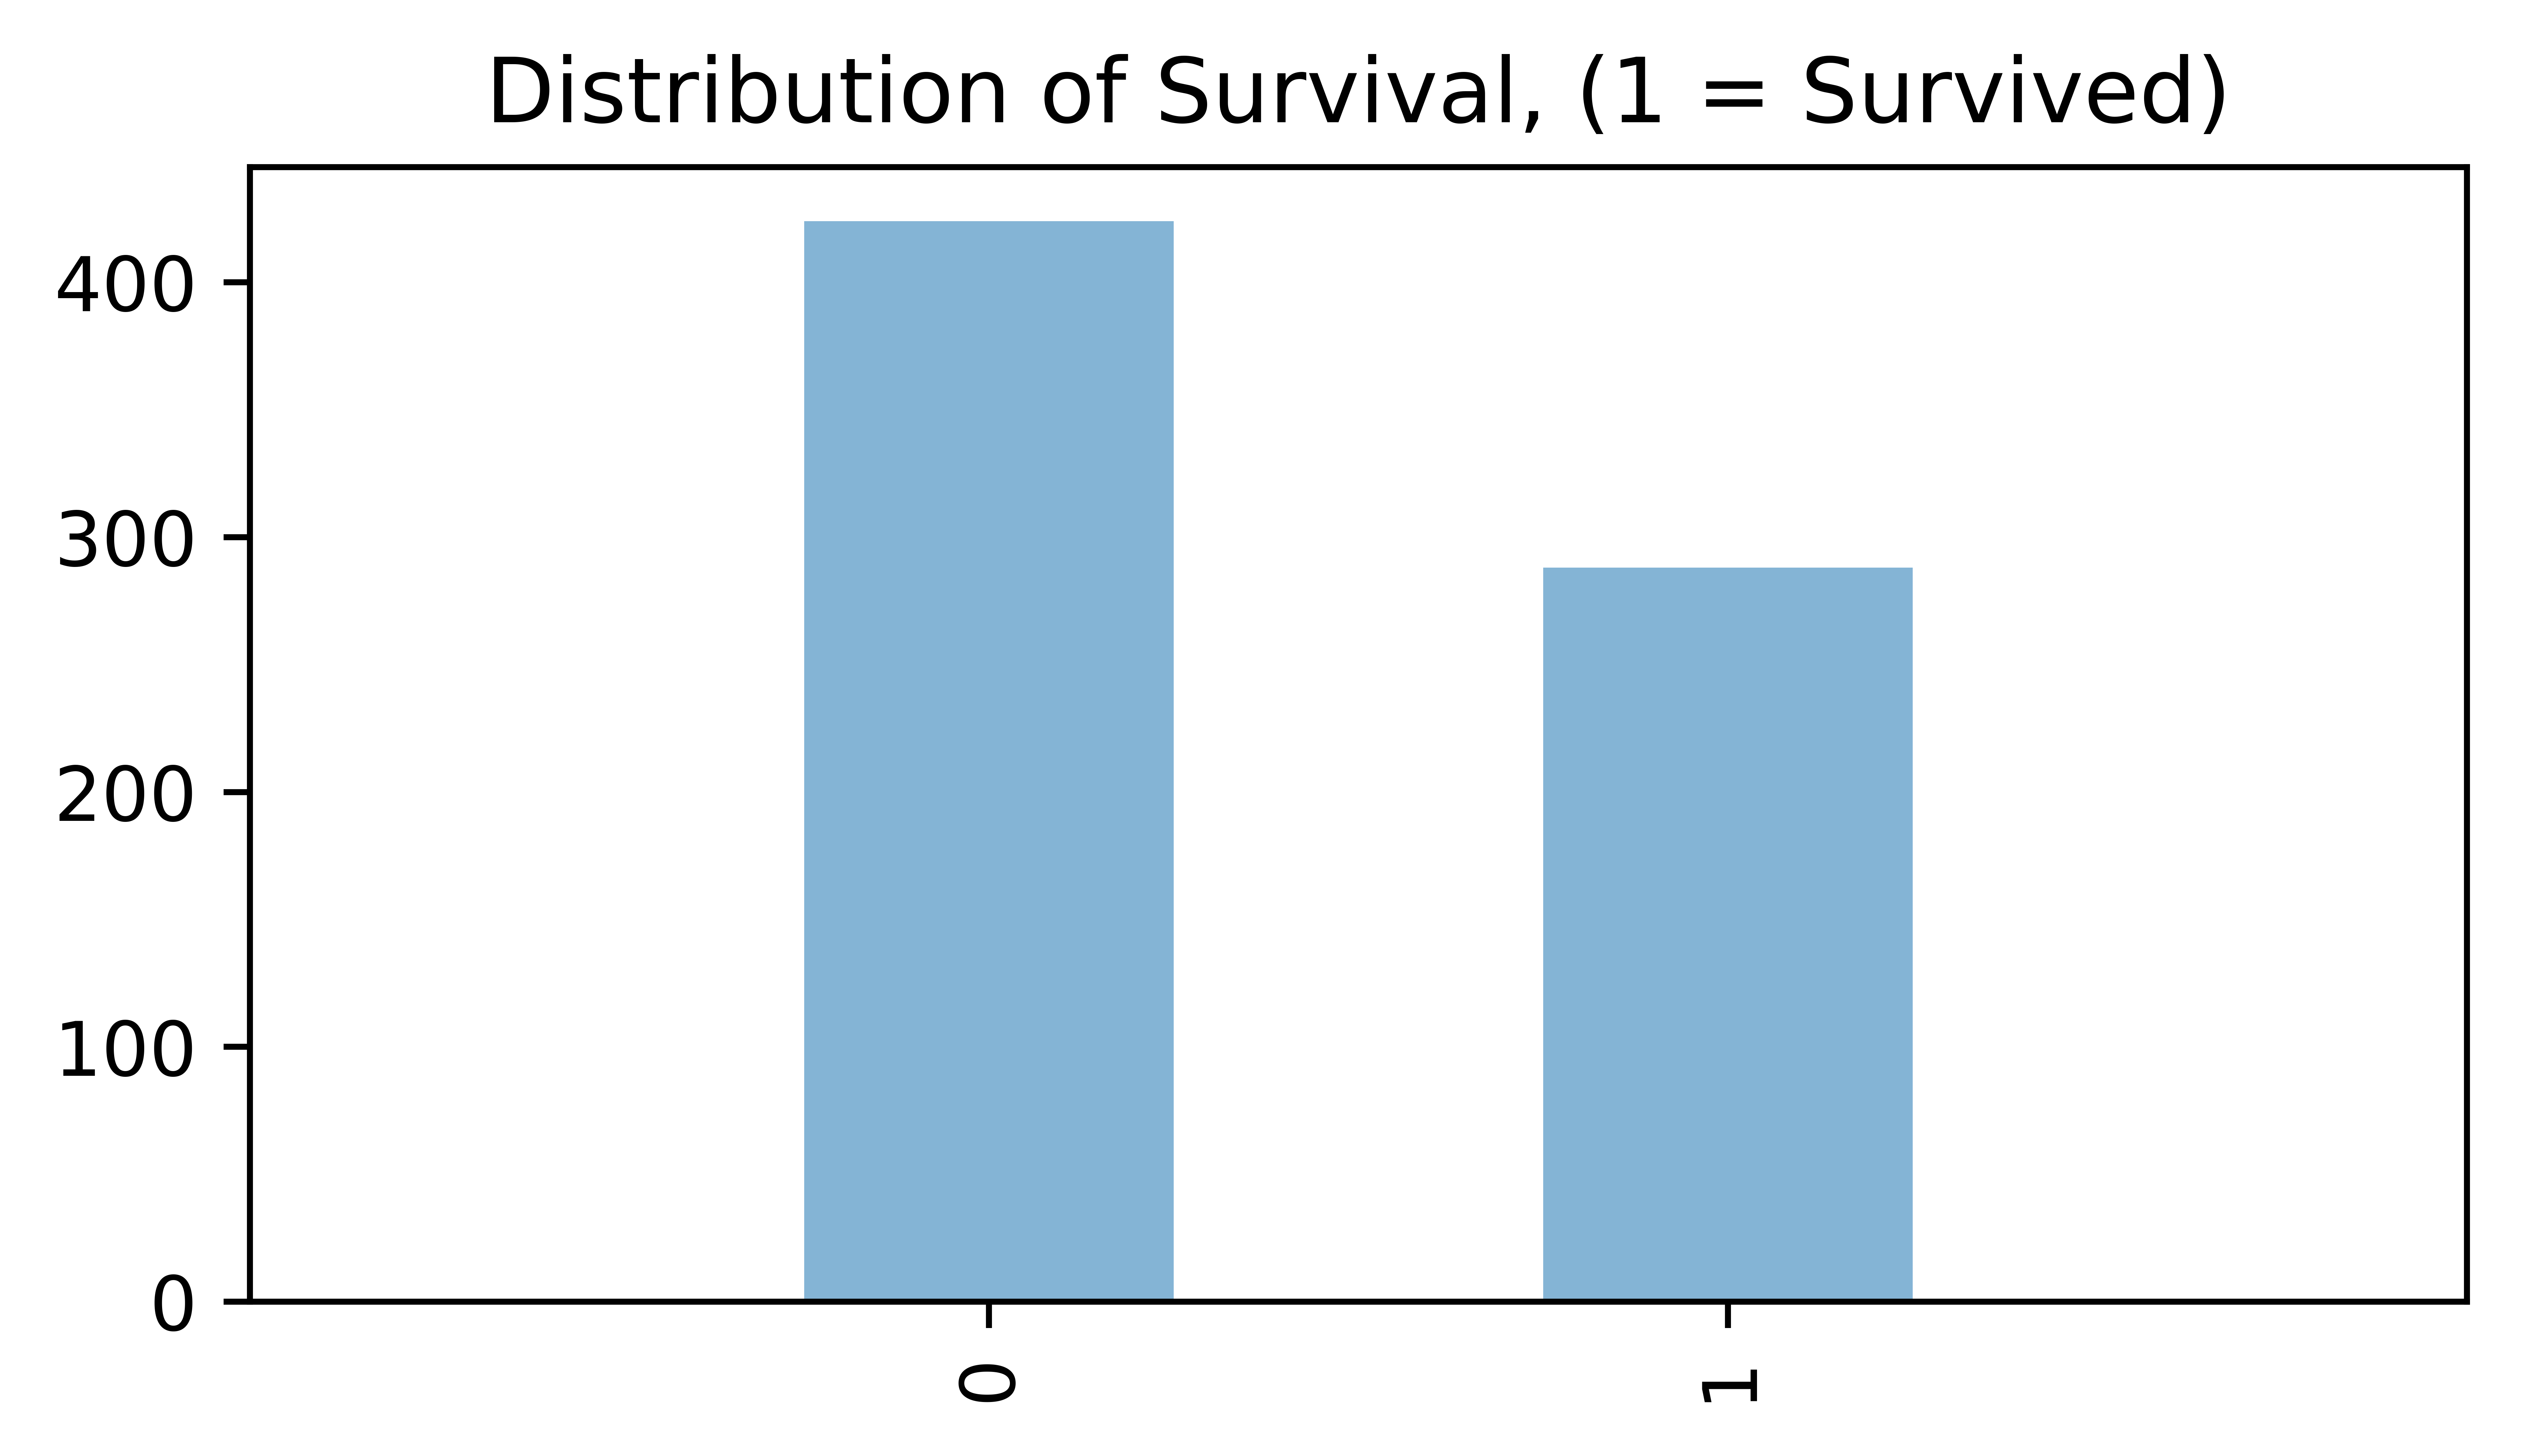

In [8]:
# Distribution of Survival, (1 = Survived)
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")

Text(0.5, 1.0, 'Survival by Age,  (1 = Survived)')

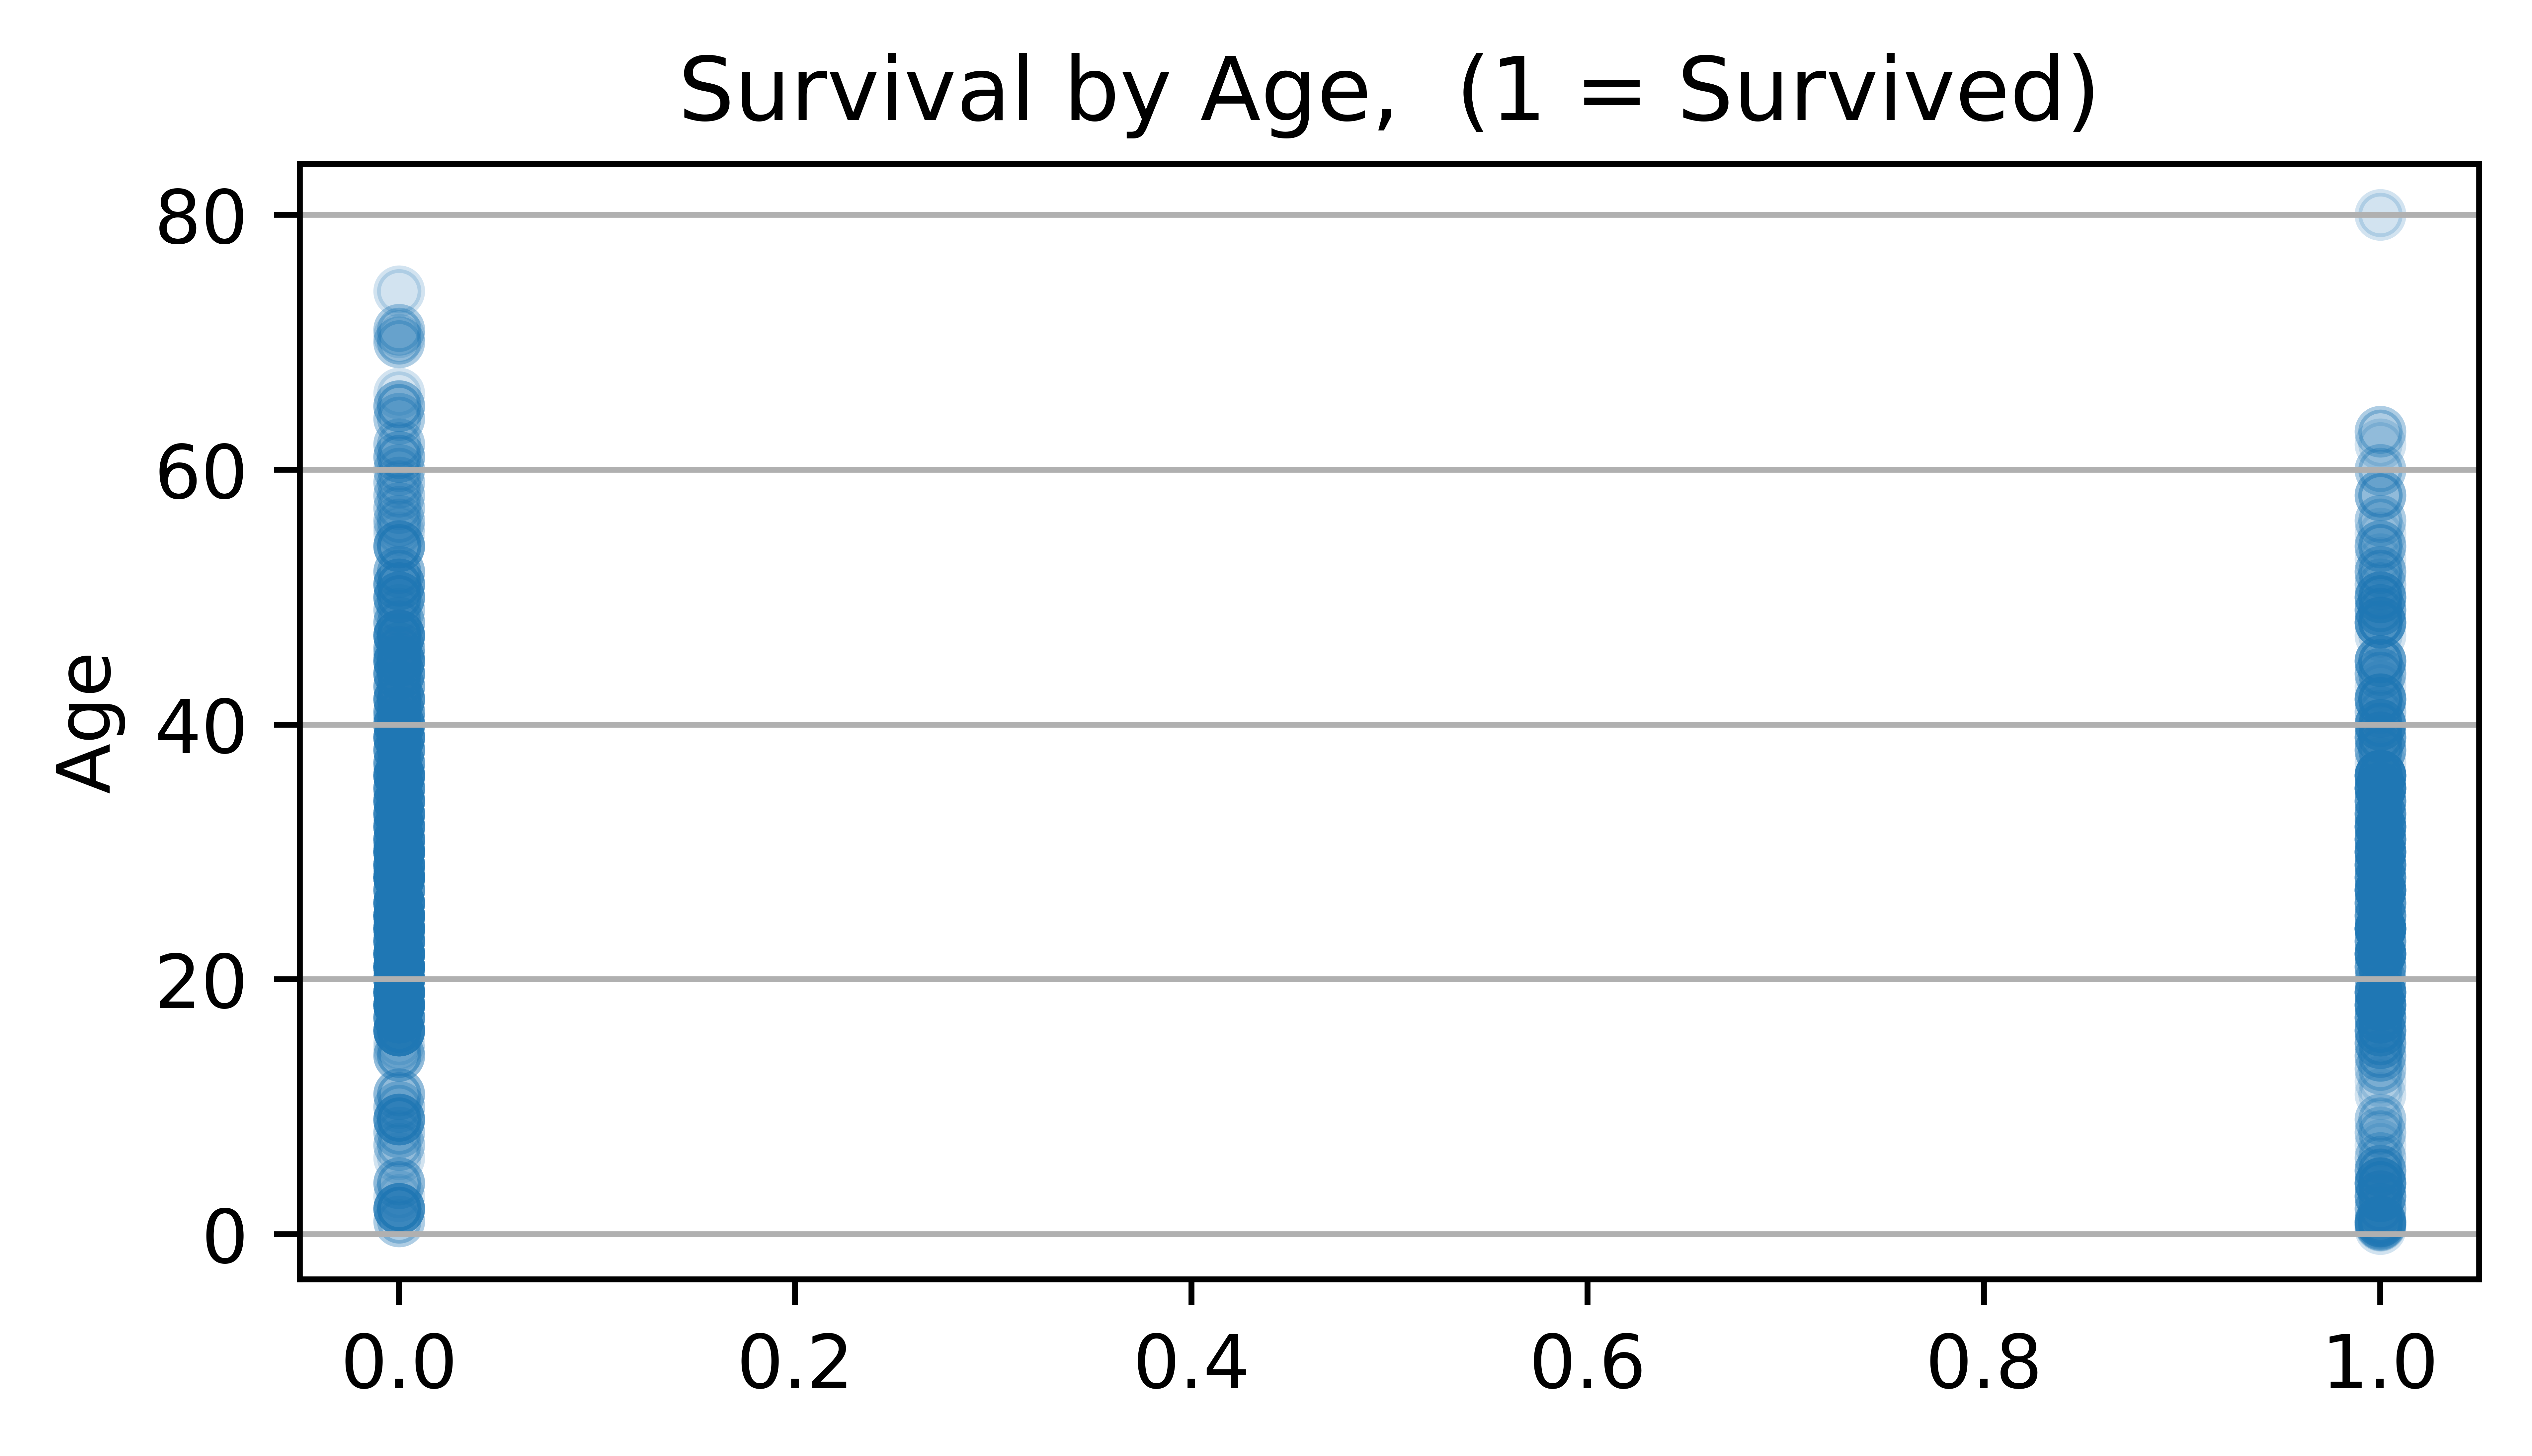

In [11]:
# Survival by Age,  (1 = Survived)
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(visible=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")